<a href="https://colab.research.google.com/github/dhawalnegi1/EVA/blob/master/Project-3/Assingment3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import Libraries and modules**

Installing the keras library if not already installed and then importing it.

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


Importing the numpy library to be used later, and importing the models and different functions of keras library , and the mnist dataset.

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

This cell is for loading the training as well as testing dataset in the specific lists. The dataset is download from and amazon storage bucket and is loaded in the defined variables.

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

The shape (no. of images and size of the image) of the training dataset is printed. We import pyplot package from matplotlib library to plot the image in the notebook. the next line is a magic function ."%" is inline magic function used to plot in the notebook instead of creating new window. we are showing the first image fron the 60000 in the training dataset.

(60000, 28, 28)


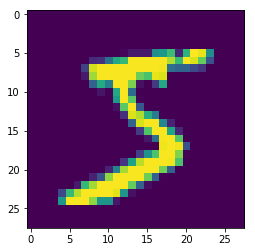

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In this cell, the test as well as training dataset's shape is modified using reshape function because the dataset loaded was 2 dimensional vector and for convolution we require 3-d vector(i.e height x width of image plus no of channels). In reshape function we are defining no. of input channel as 1.

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In this cell, we change the datatype of the dataset to float and then the pixel value of each image in training and testing datasets are normalized(i.e. between 0 & 1).



In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In this cell, we are printing the classes of 1st 10 images of training dataset,

In [7]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In, the cell we are coverting the y_train and y_test data into categorical data(i.e for each image there is array of 10 values representing either 0 or 1, telling image belong to which class). Only 1 out of 10 values can be 1. We using numpy to perform this action.

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In this cell, we are printing the categorical value of 1st 10 images of training dataset.

In [9]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

This is the cell where are model and its layers are defined. We are defining sequential model. Initial input to the model is (28x28)x1.

In [10]:
from keras.layers import Activation,BatchNormalization,MaxPooling2D
model = Sequential()


model.add(Convolution2D(8, 3, 3, activation='relu',use_bias=False, input_shape=(28,28,1)))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(8, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(8, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(8, 1,use_bias=False))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Convolution2D(8, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(16, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(32, 3, 3, activation='relu',use_bias=False))
model.add(BatchNormalization(axis=-1))
model.add(Convolution2D(10, 1))
model.add(Flatten())
model.add(Activation('softmax'))

Instructions for updating:
Colocations handled automatically by placer.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False, input_shape=(28, 28, 1...)`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(8, (3, 3), activation="relu", use_bias=False)`
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", use_bias=False)`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activatio

In [11]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 8)         72        
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 8)         576       
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 8)         32        
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 8)         576       
_________________________________________________________________
batch_normalization_3 (Batch (None, 22, 22, 8)         32        
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 20, 20, 16)        1152      
__________

Here we compile our model and configure its learning process . we pass 3 arguments,i.e. optimizer, loss function and metrics.

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In this cell, we train our model on training dataset , by dividing it into batches of size 32 each. The model is trained 10 times on dataset. i.e. it will go over all images 25 times(epochs).

In [13]:
model.fit(X_train, Y_train, batch_size=64, nb_epoch=25, verbose=1)

Instructions for updating:
Use tf.cast instead.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/25
60000/60000 [==============================] - 23s 382us/step - loss: 0.2942 - acc: 0.9146
Epoch 2/25
60000/60000 [==============================] - 21s 354us/step - loss: 0.0737 - acc: 0.9778
Epoch 3/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0567 - acc: 0.9826
Epoch 4/25
60000/60000 [==============================] - 21s 352us/step - loss: 0.0477 - acc: 0.9856
Epoch 5/25
60000/60000 [==============================] - 21s 352us/step - loss: 0.0407 - acc: 0.9869
Epoch 6/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0390 - acc: 0.9877
Epoch 7/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0355 - acc: 0.9887
Epoch 8/25
60000/60000 [==============================] - 21s 353us/step - loss: 0.0309 - acc: 0.9905
Epoch 9/25
60000/60000 [==============================] - 21s 355us/step - loss: 0.0304 - acc: 0.9905
Epoch 10/25
60000/60000 [==============================] - 21s 352us/step - loss: 

In this cell we evaluate our trained model whose output will be accuracy and loss on the test dataset.

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

Print the score calculated in previous cell

In [24]:
print(score)

[0.024272980318657936, 0.9941]


Here we are creating a new list y_pred and initilizing it with prediction values of each test image by our model in categorical form.

In [0]:
y_pred = model.predict(X_test)

printing the prediction and actual class of first 10 test images

In [26]:
print(y_pred[:9])
print(y_test[:9])

[[2.39297769e-05 1.73168046e-05 4.37632798e-06 4.33142714e-06
  9.50068352e-05 8.08523453e-08 1.76227741e-06 9.99829888e-01
  2.04501957e-05 2.80255449e-06]
 [2.90736324e-08 6.76893535e-07 9.99997616e-01 4.66083572e-09
  4.75848623e-07 2.36393904e-09 9.66559881e-08 1.11877512e-06
  4.75895601e-10 1.49162940e-08]
 [4.22381333e-07 9.99968886e-01 2.87241335e-07 1.67367531e-07
  3.09491185e-07 2.61118021e-05 1.21931373e-06 1.31101876e-06
  1.06747120e-06 1.51864242e-07]
 [9.99994874e-01 2.67062248e-08 2.03759926e-10 5.42306811e-10
  4.63977017e-11 1.44911416e-09 5.08305357e-06 1.70900591e-08
  7.22917148e-09 5.04229147e-09]
 [2.51705330e-07 1.85001426e-07 1.52610600e-08 5.77810262e-08
  9.99997735e-01 9.74009651e-10 2.30885289e-09 3.08495673e-10
  1.12042146e-10 1.75591413e-06]
 [2.26755091e-07 9.99995470e-01 1.73751090e-07 7.65472130e-09
  1.10025073e-08 1.03640707e-06 3.83551082e-07 4.41972219e-07
  2.05275933e-06 6.63743691e-08]
 [3.01241835e-06 6.72132228e-06 6.13212251e-07 5.94853389e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

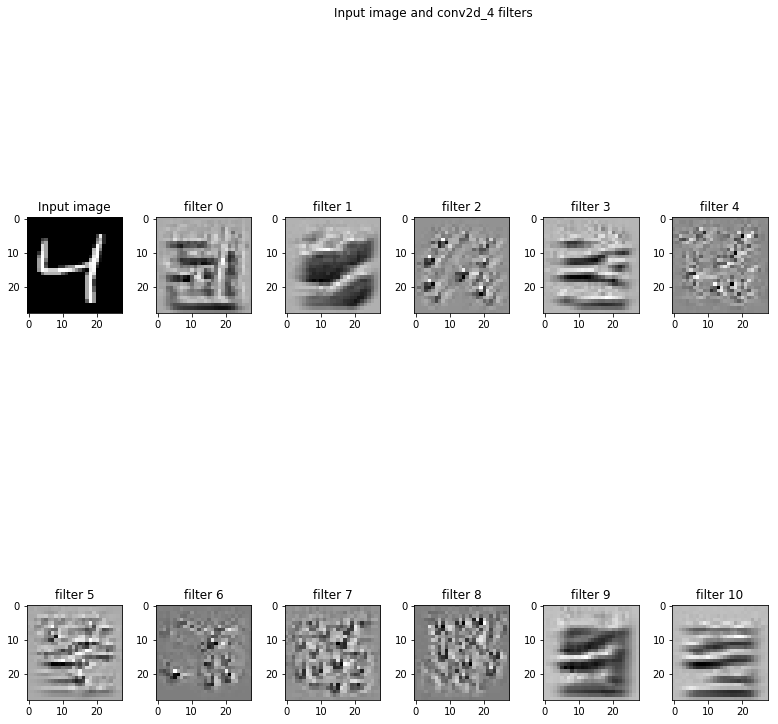

In [35]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'conv2d_4'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()